In [1]:
import keras

from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

#Loading required header files

In [2]:

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Print data types
print("x_train dtype:", x_train.dtype)
print("y_train dtype:", y_train.dtype)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
x_train dtype: uint8
y_train dtype: uint8


In [3]:

num_classes = 10

data_augmentation = False

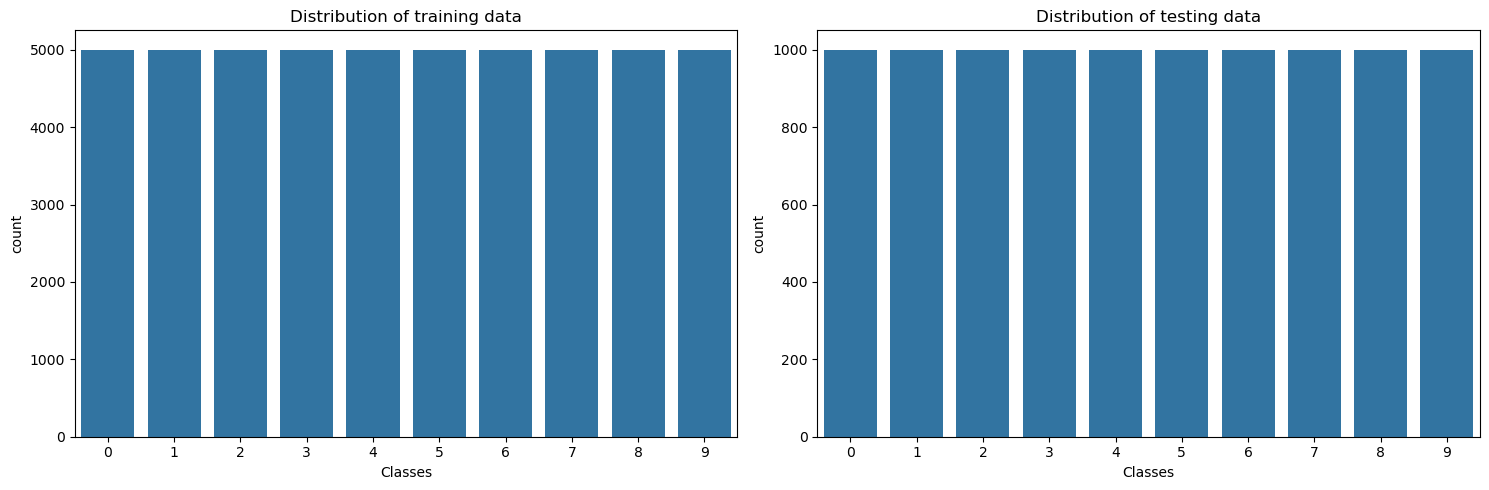

In [4]:
#checking distribution
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=y_train.ravel(), ax = axs[0],legend=False)
axs[0].set_title("Distribution of training data")
axs[0].set_xlabel("Classes")

sns.countplot(x=y_test.ravel(), ax = axs[1],legend=False)
axs[1].set_title("Distribution of testing data")
axs[1].set_xlabel("Classes")

plt.tight_layout()
plt.show()

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #since picxcel max value is 255 dividing by it will normalize the values
x_test /= 255
#one hot encoding the traget cvariablr
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils. to_categorical(y_test, num_classes)

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3), padding = 'same',activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters = 32,kernel_size = (3,3),activation="relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation="relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
          

model.add(Dropout(0.5))

model.add(Dense(num_classes,activation="softmax" ))

model.summary()


                 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [7]:
opt = keras.optimizers.RMSprop(learning_rate = 0.0001, decay = 0.000001)

model.compile(loss = "categorical_crossentropy", optimizer = opt, 
              metrics = ['accuracy'])

In [8]:
# Set parameters
batch_size = 64  # Adjusted batch size for better CPU performance
epochs = 100

# Check if using data augmentation
if not data_augmentation:
    print("Not using data augmentation.")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                        validation_data=(x_test, y_test), workers=4, use_multiprocessing=True) #using multiple core for better CPU performance
else:
    print("Using realtime data augmentation.")
    
    # Initialize ImageDataGenerator with augmentation settings
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    
    # Fit the generator to the training data (not necessary if augmentation parameters are fixed)
    datagen.fit(x_train)
    
    # Train the model using the augmented data
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size, epochs=epochs,
                                     validation_data=(x_test, y_test), workers=4, use_multiprocessing=True))



Not using data augmentation.
Epoch 1/100
782/782 [==============================] - 133s 168ms/step - loss: 1.8923 - accuracy: 0.3073 - val_loss: 1.6324 - val_accuracy: 0.4078
Epoch 2/100
782/782 [==============================] - 142s 182ms/step - loss: 1.6026 - accuracy: 0.4171 - val_loss: 1.4816 - val_accuracy: 0.4726
Epoch 3/100
782/782 [==============================] - 111s 143ms/step - loss: 1.4646 - accuracy: 0.4676 - val_loss: 1.3915 - val_accuracy: 0.4984
Epoch 4/100
782/782 [==============================] - 112s 143ms/step - loss: 1.3590 - accuracy: 0.5117 - val_loss: 1.2822 - val_accuracy: 0.5385
Epoch 5/100
782/782 [==============================] - 113s 145ms/step - loss: 1.2894 - accuracy: 0.5394 - val_loss: 1.2219 - val_accuracy: 0.5706
Epoch 6/100
782/782 [==============================] - 119s 152ms/step - loss: 1.2244 - accuracy: 0.5632 - val_loss: 1.2124 - val_accuracy: 0.5665
Epoch 7/100
782/782 [==============================] - 115s 147ms/step - loss: 1.1764 - a

In [9]:
def plotmodelhistory(history):
    fig,axs = plt.subplots(1,2, figsize = (15,5))
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train','validate'], loc = 'upper left')

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train','Validate'], loc = 'upper left')

    plt.tight_layout()
    plt.show()

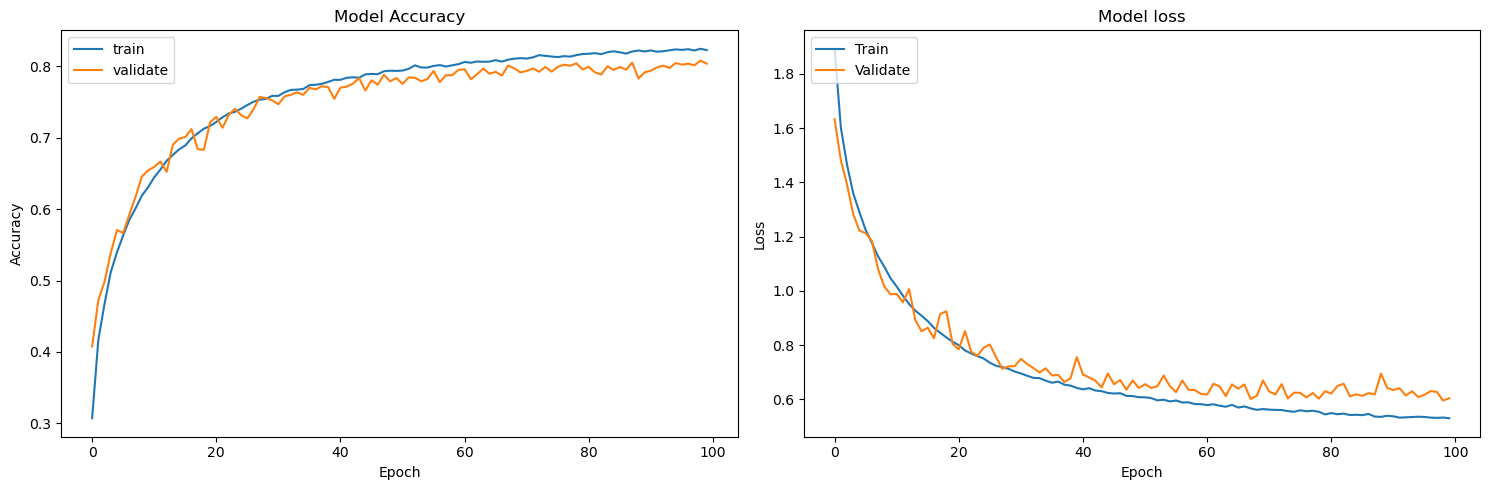

In [10]:
plotmodelhistory(history)

In [11]:
scores = model.evaluate(x_test, y_test, verbose =1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

pred = model.predict(x_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.6039 - accuracy: 0.8034
Test loss: 0.6038806438446045
Test accuracy: 0.8033999800682068
313/313 [==============================] - 9s 26ms/step


In [13]:
Y_pred_classes = np.argmax(pred, axis = 1)
Y_true = np.argmax(y_test, axis = 1)

print(classification_report(Y_true,Y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.90      0.89      0.90      1000
           2       0.79      0.63      0.70      1000
           3       0.66      0.65      0.66      1000
           4       0.70      0.85      0.77      1000
           5       0.83      0.61      0.71      1000
           6       0.76      0.92      0.83      1000
           7       0.84      0.86      0.85      1000
           8       0.86      0.91      0.89      1000
           9       0.90      0.85      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



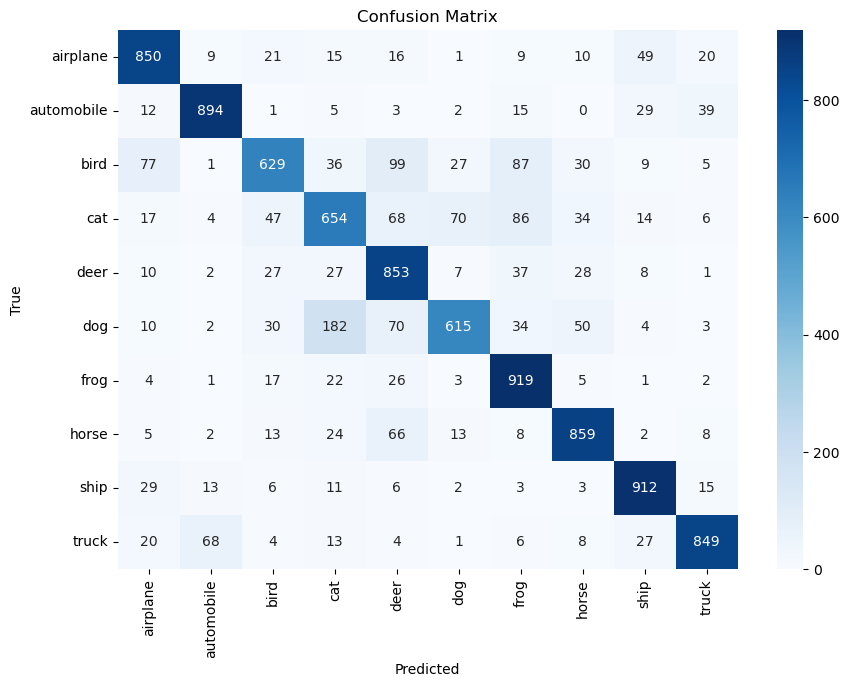

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



# Generate confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [22]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


313/313 - 6s - loss: 0.6039 - accuracy: 0.8034 - 6s/epoch - 19ms/step
Test accuracy: 0.8034
Test loss: 0.6039
